## Lorenzo Nastri

### lorenzonastri@gmail.com
### https://www.linkedin.com/in/lorenzo-nastri

# Supermercado La gondola. Año 2092
 
El supermercado la gondola es un líder en el sector minorista, atendiendo a clientes en el planeta tierra y con una sucursal en marte. Cuenta con una diversa gama de productos que incluye alimentación, tecnología, moda, entre otros. El supermercado posee toda su operacion de manera Holografica, por lo tanto es crucial predecir la conversión de los clientes dado su comportamiento. La idea será efectuar una campaña de marketing en aquello clientes que un algoritmo clasifique como compradores. Ahora bien dado que el costo de las publicidades holograficas es elevado, la empresa quiere solo publicitar en los clientes de alto valor. Para esto es importante generar una regresion que permita predecir el ingreso del cliente. 
 
Tu tarea como cientifico de datos es crear los dos algoritmos y luego calcular el rango de ganancia esperada de la propuesta, justificando tus servicios en el ROI del supermercado. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
df_conversion_para_entrenar = pd.read_csv("conversion_para_entrenar.csv")
df_conversion_para_entrenar.head()

,,id del cliente,páginas visitadas,duración de la sesión,número de visitas,fecha de nacimiento,ubicación,dispositivo,convertido
0,0,1,9,91.231418,39,1955-11-30 12:27:39.148023,Marte,tablet,Sí
1,1,2,5,740.421698,11,1998-11-19 12:27:39.148023,Marte,móvil,No
2,2,3,6,15.947268,3,1962-11-28 12:27:39.148023,Marte,tablet,Sí
3,3,4,5,950.486443,18,1967-11-27 12:27:39.148023,Marte,móvil,Sí
4,4,5,5,63.656943,26,1982-11-23 12:27:39.148023,Marte,ordenador,No


In [3]:
df_conversion_para_entrenar.columns

Index(['     ', 'id del cliente ', 'páginas visitadas ',
       'duración de la sesión ', 'número de visitas ',
       'fecha de nacimiento        ', 'ubicación ', 'dispositivo ',
       'convertido'],
      dtype='object')

##### Remuevo los espacios en blanco de cada columna para trabajar mejor.

In [4]:
from functions import whitespace_remover_and_columns
df_conversion_para_entrenar = whitespace_remover_and_columns(df_conversion_para_entrenar)

In [5]:
df_conversion_para_entrenar.columns

Index(['', 'id del cliente', 'páginas visitadas', 'duración de la sesión',
       'número de visitas', 'fecha de nacimiento', 'ubicación', 'dispositivo',
       'convertido'],
      dtype='object')

##### Procedo a remover la columna '' ya que no me es de utilidad.

In [6]:
df_conversion_para_entrenar.drop(columns = [""], inplace = True)

##### Valido los datos para ver si hay valores nulos, etc.

In [7]:
from functions import validate_columns
validate_columns(df_conversion_para_entrenar)

,Unique_Values,Num_Unique_Values,Num_Null_Values,%_Null_Values,Sample_Unique_Values
id del cliente,NaN,3000.0,0,0.0,"[1681, 2645, 838, 1825, 359]"
páginas visitadas,NaN,3000.0,0,0.0,"[3, 4, 3, 4, 2]"
duración de la sesión,NaN,3000.0,0,0.0,"[372.1697912482389, 285.5925382941073, 323.688..."
número de visitas,NaN,3000.0,0,0.0,"[18, 30, 15, 38, 49]"
fecha de nacimiento,90,3000,0,0.0,"[1996-11-19 12:27:39.148023, 1955-11-30 12:27:..."
ubicación,4,3000,0,0.0,"[Ciudad A, Ciudad B, Ciudad B, Ciudad B, Ciuda..."
dispositivo,3,3000,0,0.0,"[tablet, tablet, ordenador, tablet, tablet]"
convertido,2,3000,0,0.0,"[Sí, No, Sí, No, No]"


___

# 1. Clasificación

In [8]:
df_conversion_para_entrenar.head()

,id del cliente,páginas visitadas,duración de la sesión,número de visitas,fecha de nacimiento,ubicación,dispositivo,convertido
0,1,9,91.231418,39,1955-11-30 12:27:39.148023,Marte,tablet,Sí
1,2,5,740.421698,11,1998-11-19 12:27:39.148023,Marte,móvil,No
2,3,6,15.947268,3,1962-11-28 12:27:39.148023,Marte,tablet,Sí
3,4,5,950.486443,18,1967-11-27 12:27:39.148023,Marte,móvil,Sí
4,5,5,63.656943,26,1982-11-23 12:27:39.148023,Marte,ordenador,No


In [9]:
df_conversion_para_entrenar["ubicación"].value_counts()

ubicación
Ciudad B    1396
Ciudad A    1394
Marte        150
Ciudad C      60
Name: count, dtype: int64

Hice un boxplot para comparar las variables de navegación entre Marte y la Tierra.


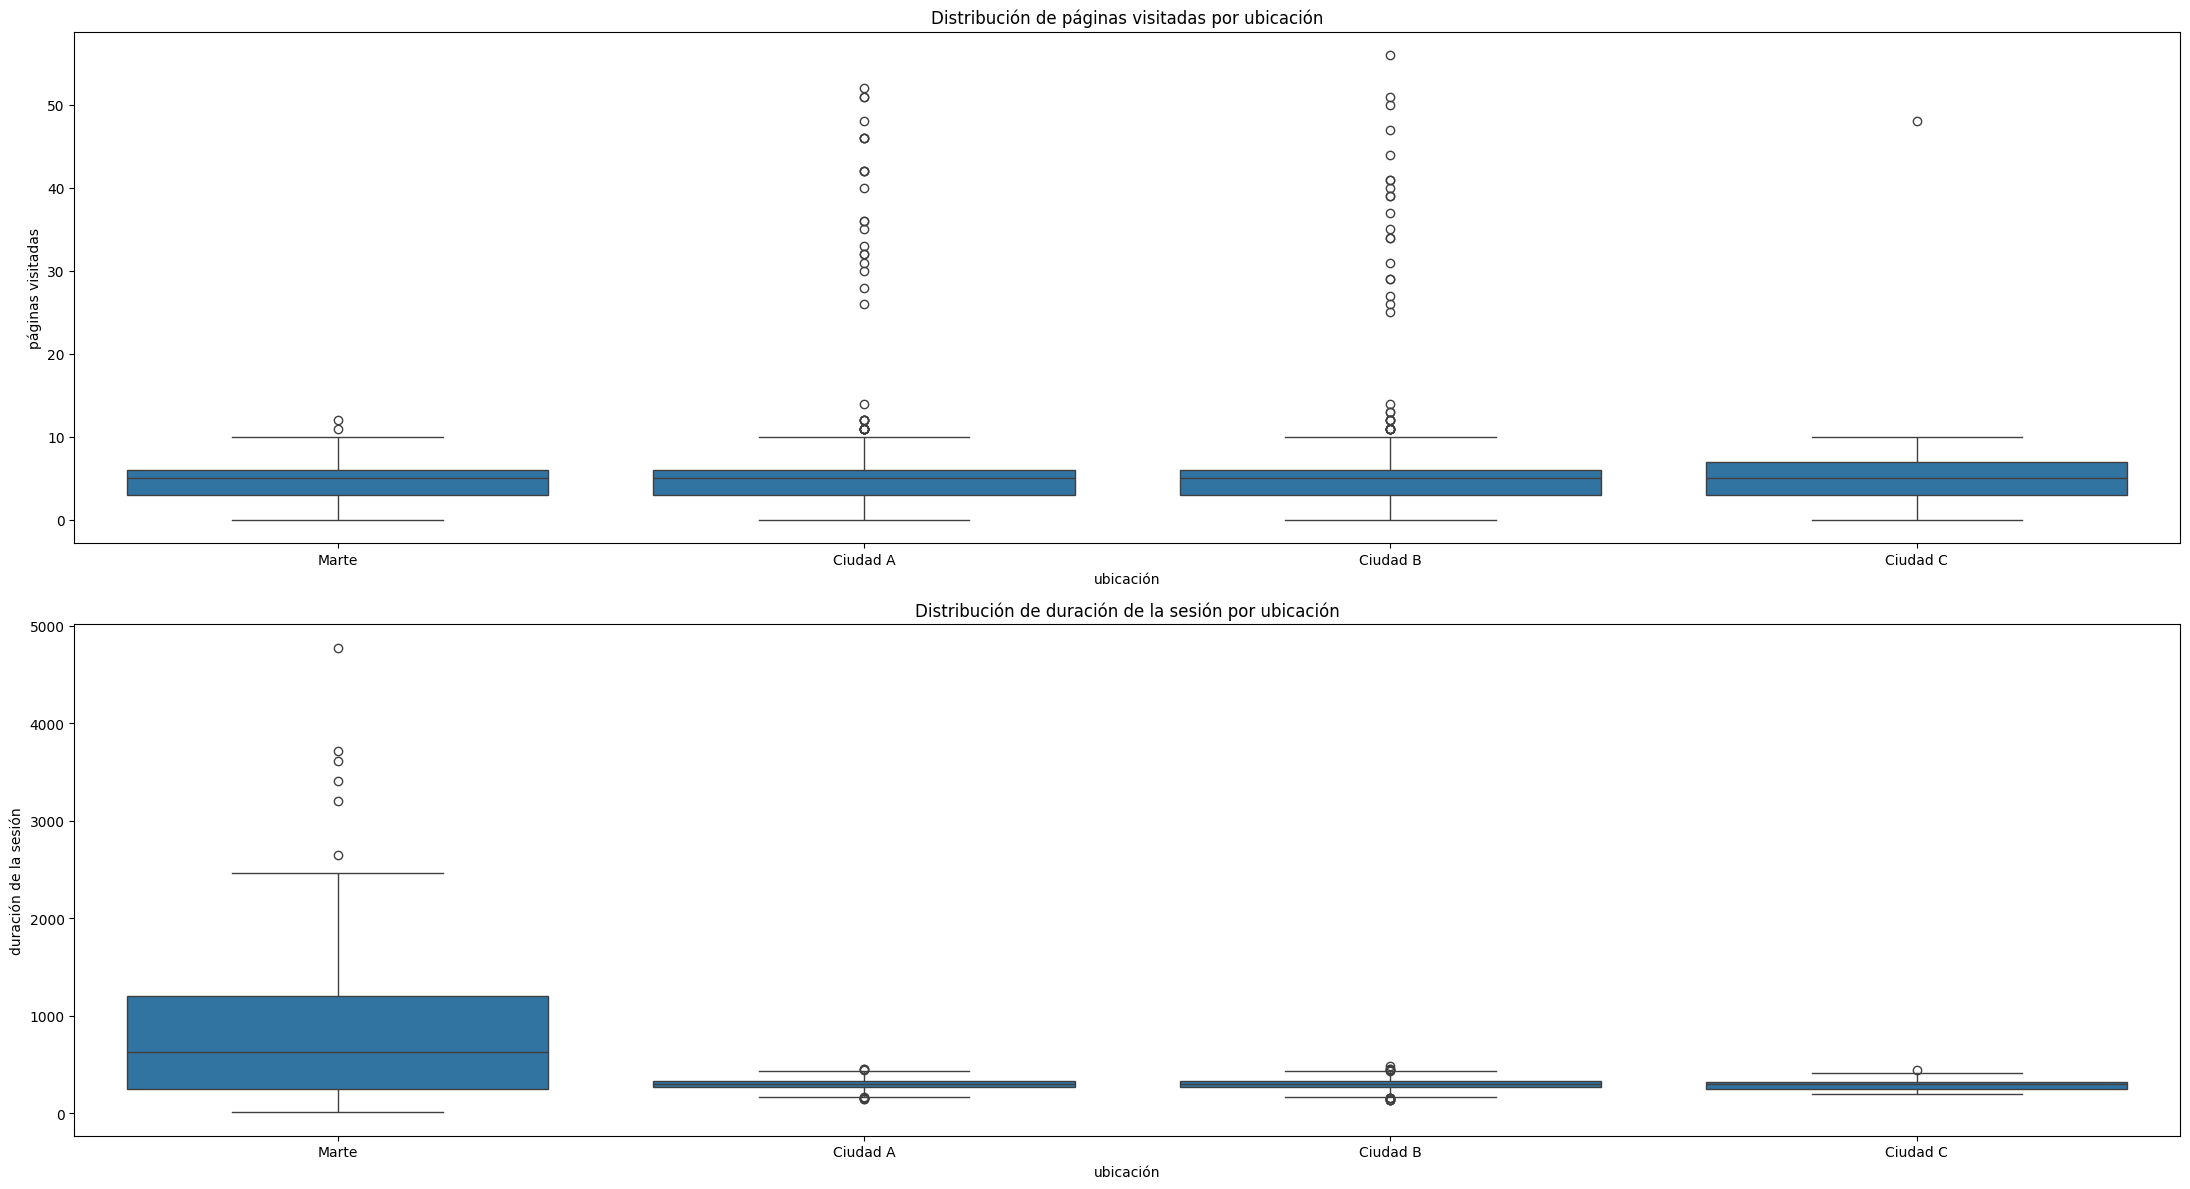

In [10]:
from functions import distribucion_entre_variables

other_variables = ['páginas visitadas', "duración de la sesión"]

distribucion_entre_variables(df_conversion_para_entrenar, 'ubicación', other_variables)

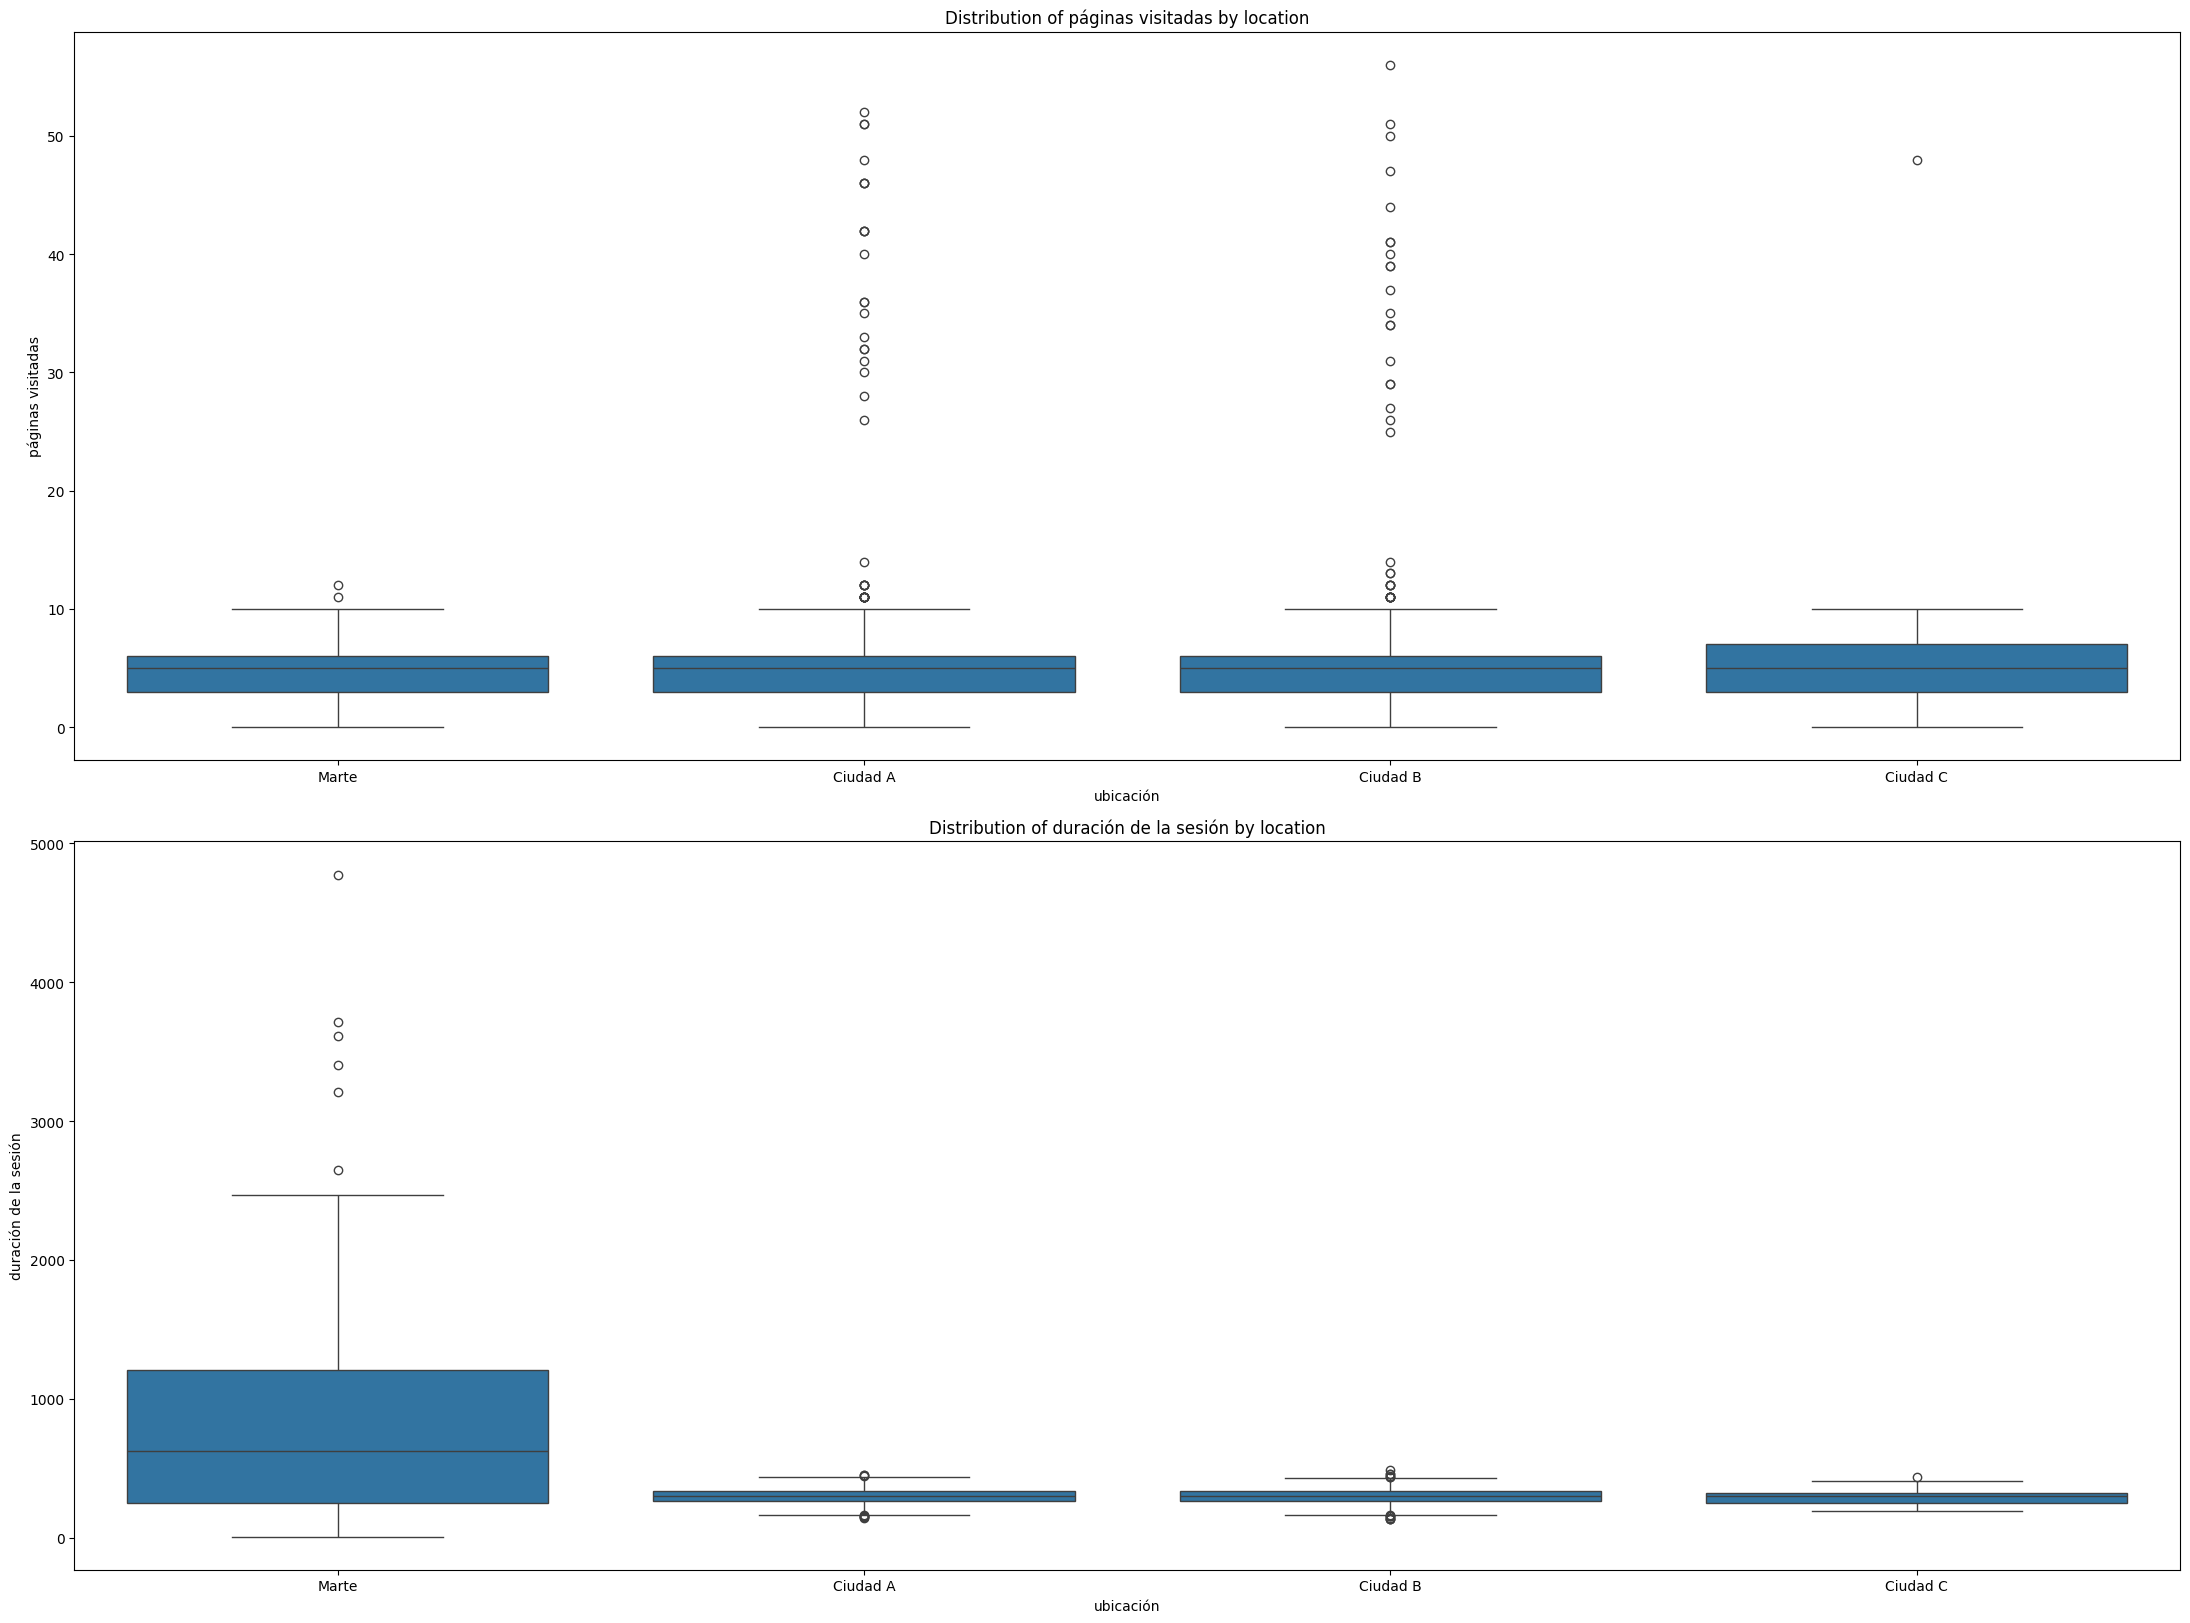

In [11]:
other_variables = ['páginas visitadas', "duración de la sesión"]

plt.figure(figsize=(22, 24))
for i, variable in enumerate(other_variables, 1):
    plt.subplot(3, 1, i)
    sns.boxplot(x='ubicación', y=variable, data=df_conversion_para_entrenar)
    plt.title(f'Distribution of {variable} by location')

plt.tight_layout()
plt.show()

Decidí hacer un t-test para ver si hay una diferencia significativa entre los dos grupos. La hipótesis nula es que no hay diferencia entre los dos grupos. La hipótesis alternativa es que hay una diferencia entre los dos grupos.

In [12]:
from scipy.stats import ttest_ind

grupo1 = df_conversion_para_entrenar[df_conversion_para_entrenar["ubicación"] == "Marte"]["duración de la sesión"]
grupo2 = df_conversion_para_entrenar[df_conversion_para_entrenar["ubicación"] != "Marte"]["duración de la sesión"]

t_stat, p_value = ttest_ind(grupo1, grupo2)

if p_value < 0.05:
    print("Rechazar la hipótesis nula. Hay una diferencia significativa entre Marte y Tierra en la variable duración de la sesión.")
else:
    print("No rechazar la hipótesis nula. No una diferencia significativa entre Marte y Tierra en la variable duración de la sesión.")


Rechazar la hipótesis nula. Hay una diferencia significativa entre Marte y Tierra en la variable duración de la sesión.


##### Procedo a remover los valores de Marte, ya que no es útil tener en cuenta sus datos para predecir el comportamiento de los clientes en la Tierra. Tampoco es mucha la cantidad de datos que tengo de Marte, por lo que no me afecta mucho removerlos.

In [13]:
df_conversion_para_entrenar = df_conversion_para_entrenar[df_conversion_para_entrenar["ubicación"] != "Marte"]

Obtengo variables dummy de la variable converted para poder trabajar mejor con ella.

In [14]:
df_conversion_para_entrenar['convertido'] = df_conversion_para_entrenar['convertido'].map({'Sí': 1, 'No': 0})

In [15]:
df_conversion_para_entrenar.head()

,id del cliente,páginas visitadas,duración de la sesión,número de visitas,fecha de nacimiento,ubicación,dispositivo,convertido
150,151,8,414.129933,11,2005-11-17 12:27:39.148023,Ciudad A,móvil,0
151,152,3,247.930919,6,1986-11-22 12:27:39.148023,Ciudad B,ordenador,0
152,153,4,261.724178,19,1966-11-27 12:27:39.148023,Ciudad B,ordenador,0
153,154,2,294.076794,31,1975-11-25 12:27:39.148023,Ciudad B,tablet,0
154,155,5,363.287411,23,1998-11-19 12:27:39.148023,Ciudad A,móvil,1


In [16]:
df_conversion_para_entrenar.groupby("ubicación").agg({"convertido": "mean"}).reset_index()

,ubicación,convertido
0,Ciudad A,0.483501
1,Ciudad B,0.483524
2,Ciudad C,0.516667


### Tratamiento de outliers

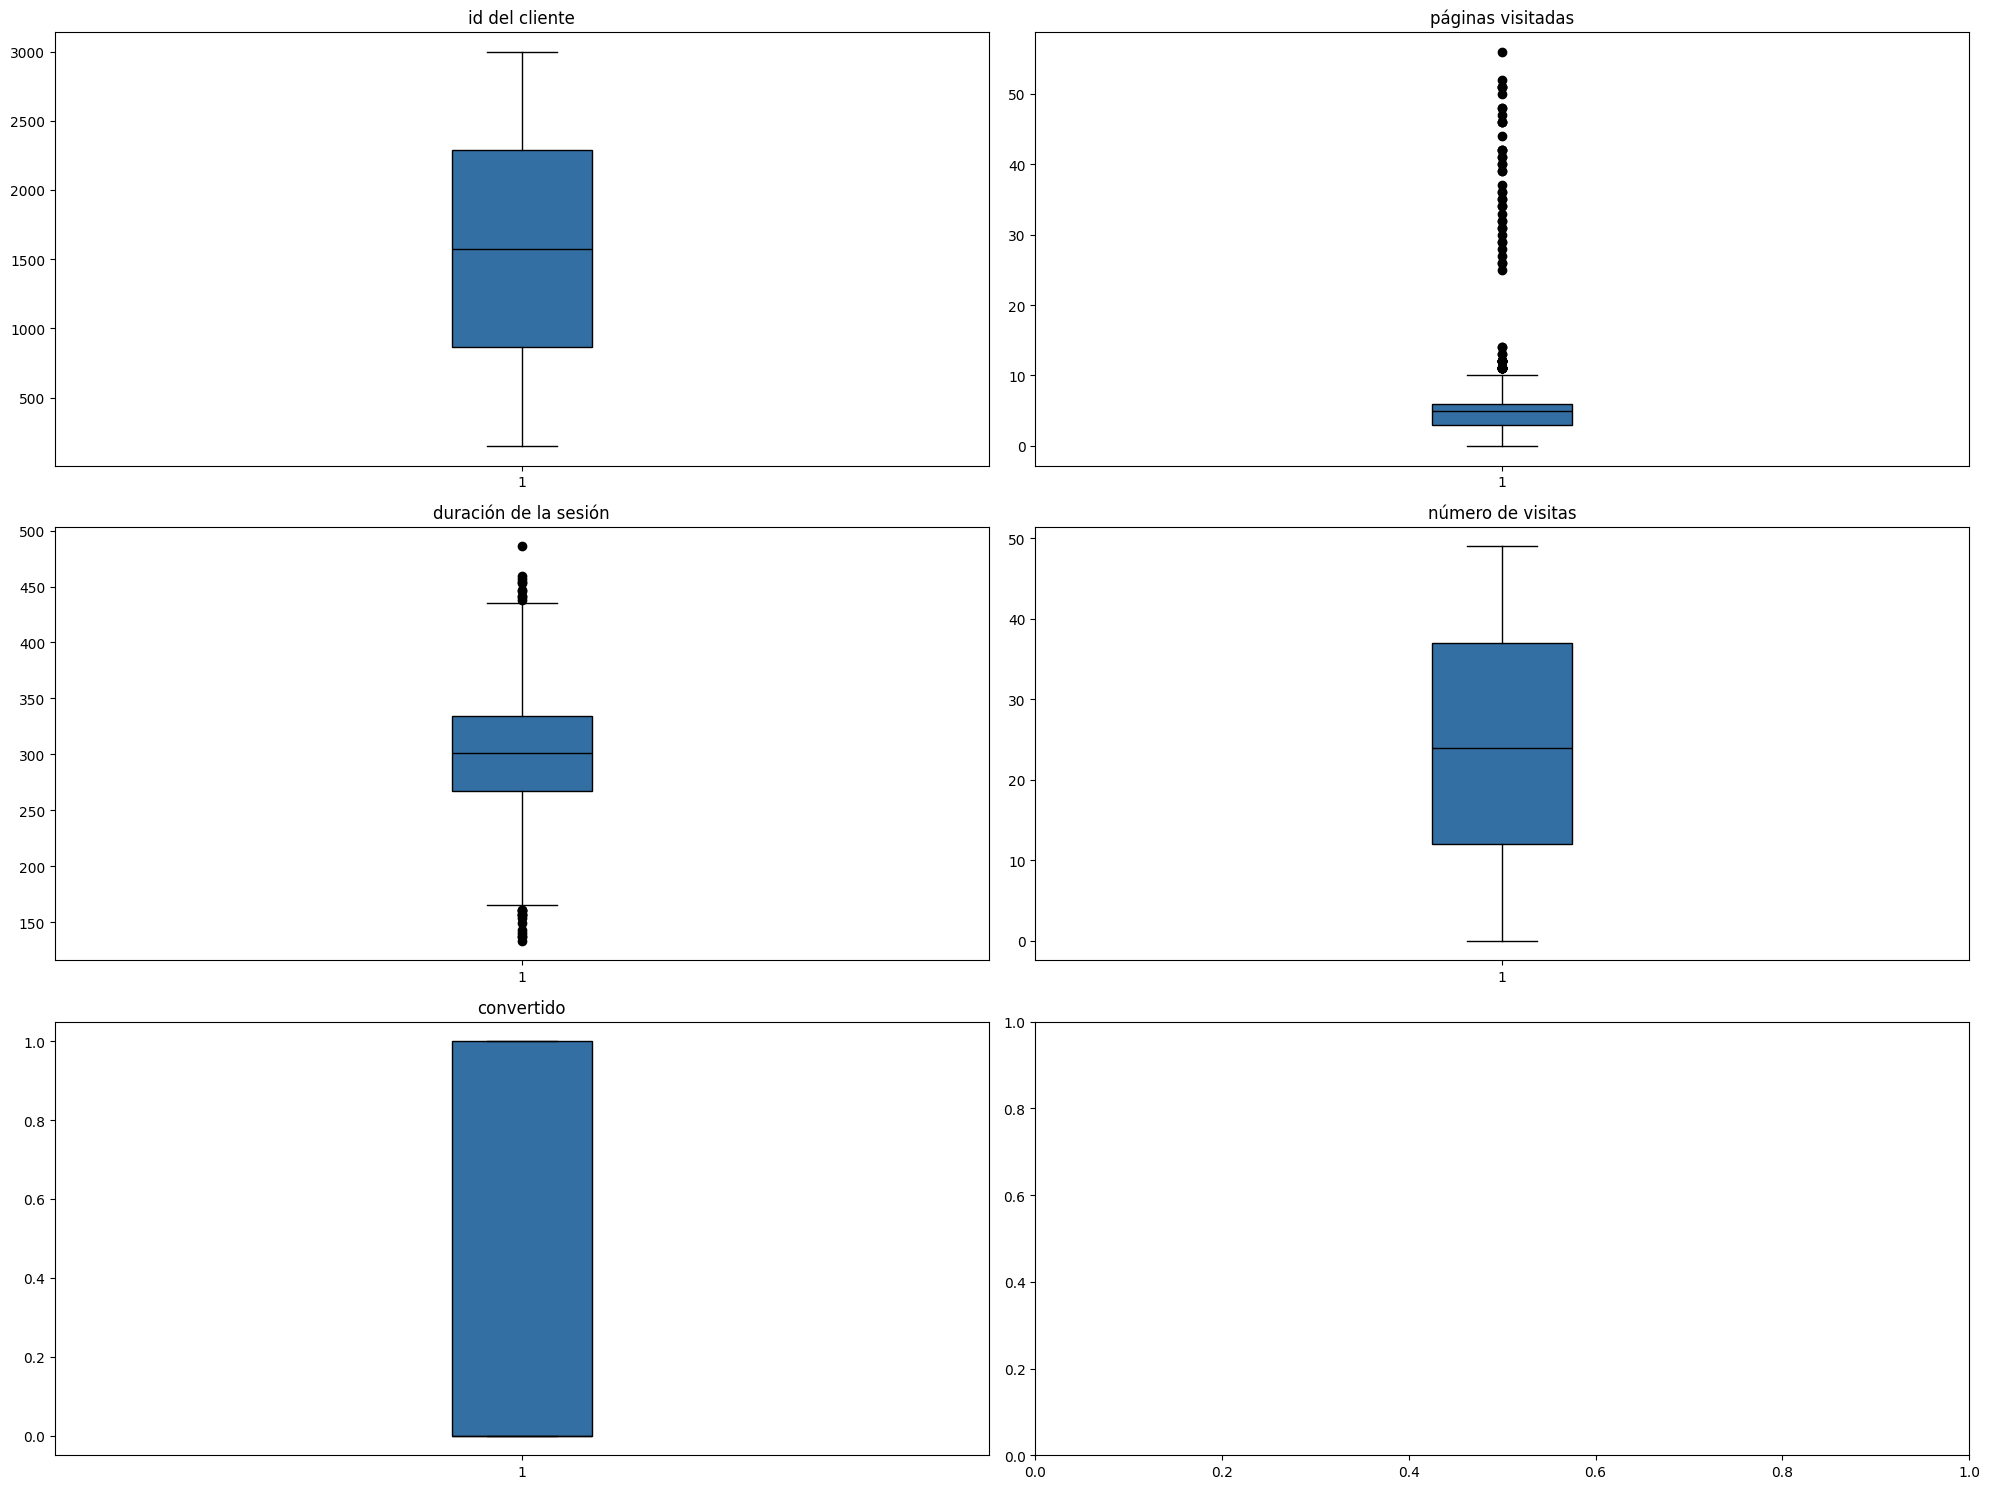

In [17]:
from functions import plot_outliers
plot_outliers(df_conversion_para_entrenar)

Aparentemente, según el gráfico que hice, hay 2 columnas con outliers.

Para determinar la cantidad de outliers en cada columna, crearé una columna que me dirá si esa fila es un outlier o no. Esto se llama columna de flag. Usaré la función find_and_filter_outliers.

In [18]:
def find_and_filter_outliers(dataframe, column_name):

    Q1 = dataframe[column_name].quantile(0.25)
    Q3 = dataframe[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    dataframe['is_outlier'] = dataframe[column_name].apply(lambda x: 'Yes' if (x < lower_bound or x > upper_bound) else 'No')
   
    return dataframe[dataframe['is_outlier'] == 'No']

Voy a remover solamente una de las dos columnas que tienen outliers, ya que luego voy a hacer un modelo de árbol de decisión. Los modelos de árbol de decisión son robustos a los outliers.

Entonces,la que más afectaría al modelo sería la de páginas visitadas ya que es la que tiene más outliers.

In [19]:
df_conversion_para_entrenar.shape

(2850, 8)

In [20]:
df_conversion_para_entrenar = find_and_filter_outliers(df_conversion_para_entrenar, "páginas visitadas")

In [21]:
df_conversion_para_entrenar["is_outlier"].value_counts()

is_outlier
No    2776
Name: count, dtype: int64

Aparentemente, el dataframe tenía 74 valores outliers ya que el dataset original tenía 2850 filas y ahora tiene 2776 filas.

##### He decidido remover la columna de páginas visitadas ya que lo más común es visitar entre 1 y 10 páginas. Es muy raro visitar por encima de 20 o 30 páginas. Además, siento que es un poco más común que haya más duración de sesión que páginas visitadas.

### Hipotesis: La variable duración de sesión es la que más afecta a la conversión de los clientes. A mayor duración de sesión, mayor probabilidad de que el cliente compre.

Creación de variables dummy para ubicación y dispositivo.

In [22]:
df_con_dummies = pd.get_dummies(df_conversion_para_entrenar, columns=["ubicación", "dispositivo"])
df_con_dummies = df_con_dummies.replace({True: 1, False: 0})

In [23]:
df_con_dummies['duración de la sesión'] = df_conversion_para_entrenar['duración de la sesión'].astype(int)

### Creación de la columna de Edad del Cliente

Substraigo el año de la fecha de nacimiento del año actual para obtener la edad del cliente.

El día que se ha tomado es la fecha en la que se ha hecho este proyecto. "2023-12-30"

In [24]:
df_con_dummies["hoy"]= "2023-12-30"
df_con_dummies['hoy'] = pd.to_datetime(df_con_dummies['hoy'])
df_con_dummies['fecha de nacimiento'] = pd.to_datetime(df_con_dummies['fecha de nacimiento'])
df_con_dummies['edad'] = (df_con_dummies['hoy'] - df_con_dummies['fecha de nacimiento']).dt.days//365

In [25]:
df_con_dummies.head()

,id del cliente,páginas visitadas,duración de la sesión,número de visitas,fecha de nacimiento,convertido,is_outlier,ubicación_Ciudad A,ubicación_Ciudad B,ubicación_Ciudad C,dispositivo_móvil,dispositivo_ordenador,dispositivo_tablet,hoy,edad
150,151,8,414,11,2005-11-17 12:27:39.148023,0,No,1,0,0,1,0,0,2023-12-30,18
151,152,3,247,6,1986-11-22 12:27:39.148023,0,No,0,1,0,0,1,0,2023-12-30,37
152,153,4,261,19,1966-11-27 12:27:39.148023,0,No,0,1,0,0,1,0,2023-12-30,57
153,154,2,294,31,1975-11-25 12:27:39.148023,0,No,0,1,0,0,0,1,2023-12-30,48
154,155,5,363,23,1998-11-19 12:27:39.148023,1,No,1,0,0,1,0,0,2023-12-30,25


##### Variable dependiente: convertido
##### Variables independientes: numero de visitas, paginas visitadas, duracion de la sesion, edad del cliente, dispositivo, ubicacion.

In [26]:
X = df_con_dummies[["número de visitas", "páginas visitadas", "duración de la sesión", "dispositivo_móvil", "dispositivo_ordenador", "dispositivo_tablet", "ubicación_Ciudad A", "ubicación_Ciudad B", "ubicación_Ciudad C", "edad"]]
y = df_con_dummies["convertido"]

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [28]:
decision_tree_model = DecisionTreeClassifier(max_depth=3)
decision_tree_model = decision_tree_model.fit(X_train, y_train)

In [29]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(decision_tree_model, X, y, cv=5)  
print('Puntuación de validación cruzada:', score)

# Precisión en entrenamiento
dt_train_accuracy = decision_tree_model.score(X_train, y_train)
print("Precisión en entrenamiento =", dt_train_accuracy) 

# Precisión en pruebas
dt_test_accuracy = decision_tree_model.score(X_test, y_test)
print("Precisión en pruebas =", dt_test_accuracy)

Puntuación de validación cruzada: [0.51079137 0.51351351 0.47567568 0.4954955  0.5009009 ]
Precisión en entrenamiento = 0.5247747747747747
Precisión en pruebas = 0.5089928057553957


La precisión en entrenamiento es un 2% mas alta que en el de pruebas.

In [30]:
y_pred = decision_tree_model.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
tp, fn, fp, tn = conf_matrix.ravel()

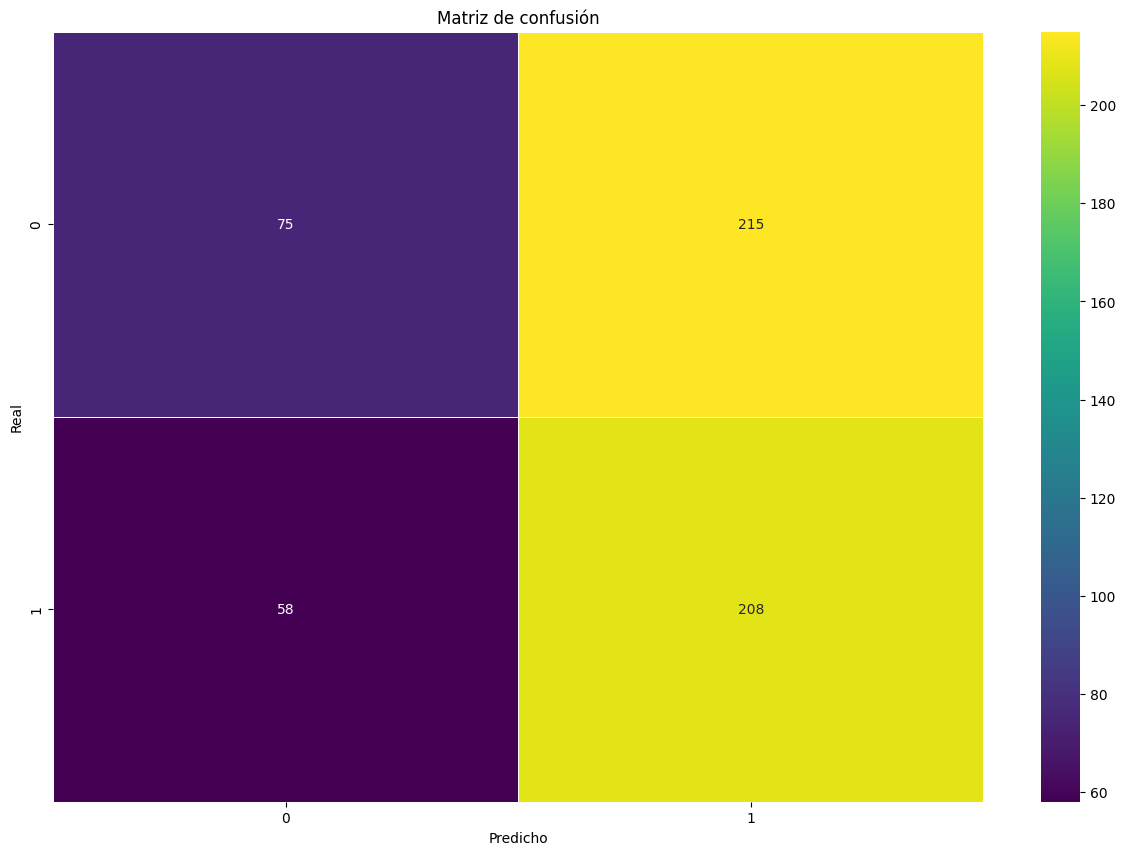

In [32]:
y_true = y_test

f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(conf_matrix, annot=True, linewidth=0.5, fmt=".0f", cmap='viridis', ax=ax)
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title('Matriz de confusión')
plt.show()

In [33]:
y_test.shape

(556,)

La precisión es la relación entre las predicciones correctas y el número total de predicciones correctas previstas. Esto mide la precisión del clasificador a la hora de predecir casos positivos.

Aplicado a este contexto de clasificación, la precisión es la relación entre los clientes que realmente compraron y los clientes que el modelo predijo que compraron.

In [34]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

print("Precision:", precision_score(y_true, y_pred))
print("Recall:", recall_score(y_true, y_pred))
print("Exactitud:", accuracy_score(y_true, y_pred))

Precision: 0.491725768321513
Recall: 0.7819548872180451
Exactitud: 0.5089928057553957


## Tree visualization

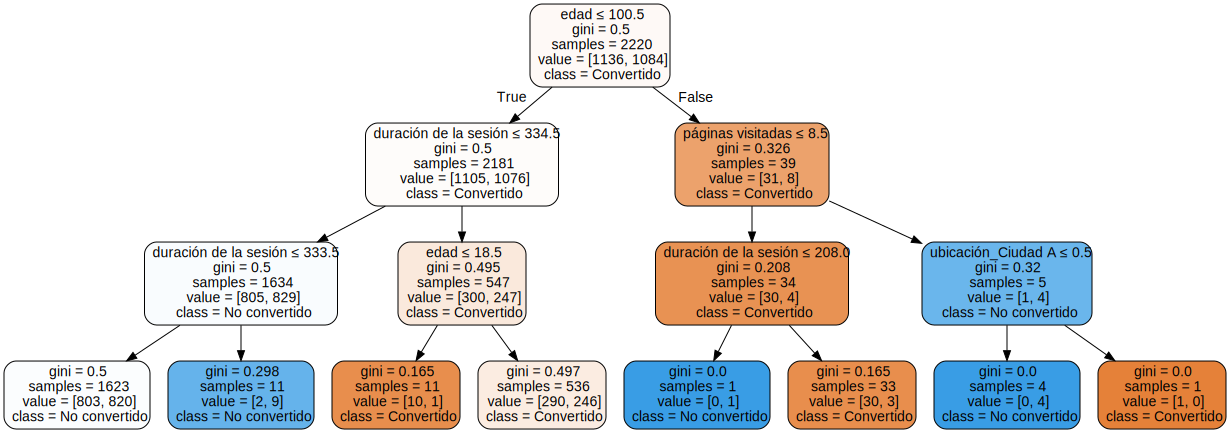

In [35]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(decision_tree_model, out_file=None, 
                           feature_names=X_train.columns,  
                           class_names=['Convertido', 'No convertido'],  
                           filled=True, rounded=True,  
                           special_characters=True)  

graph = graphviz.Source(dot_data)  
graph.render("arbol_decision") 
graph 

La duración de la sesión y el número de visitas son los criterios principales para determinar si una campaña publicitaria será exitosa o no. Si la duración de la sesión es menor o igual a 333.5 y el número de visitas es menor o igual a 30.5, la campaña es menos probable de ser exitosa. Por otro lado, si la duración de la sesión es mayor que 334.5 y el número de visitas es mayor que 40.0, la campaña es más probable de ser exitosa.


____

# 2. Regresión

In [36]:
df_ingreso_para_entrenar = pd.read_csv("ingreso_para_entrenar.csv")
df_ingreso_para_entrenar.head() 

,Unnamed: 0,gasto_alimentacion,gasto_tecnologia,gasto_moda,frecuencia_compra,promociones_utilizadas,distancia_a_hipermercados,ingreso_cliente
0,0,437.086107,318.442747,246.279263,7.0,6,56.235016,319.511016
1,1,955.642876,835.756374,235.234099,3.0,8,52.603747,430.490885
2,2,758.794548,1315.771462,729.690935,5.0,1,82.980012,643.483521
3,3,638.792636,1111.726085,237.159650,3.0,3,50.024691,322.259467
4,4,240.416776,1219.513664,253.962295,NaN,3,38.493164,366.779166


In [37]:
df_ingreso_para_entrenar.drop(columns = ["Unnamed: 0"], inplace = True)

### Valores faltantes

In [38]:
df_ingreso_para_entrenar.isna().sum()

gasto_alimentacion            0
gasto_tecnologia              0
gasto_moda                   50
frecuencia_compra            80
promociones_utilizadas        0
distancia_a_hipermercados     0
ingreso_cliente               0
dtype: int64

In [39]:
df_ingreso_para_entrenar["gasto_moda"].value_counts()

gasto_moda
246.279263    1
346.348181    1
543.015112    1
404.211353    1
710.117553    1
             ..
337.879162    1
392.177382    1
326.789766    1
140.768750    1
703.560526    1
Name: count, Length: 950, dtype: int64

In [40]:
df_ingreso_para_entrenar["frecuencia_compra"].value_counts().sort_values(ascending=True)

frecuencia_compra
0.0       5
11.0      6
10.0     11
1.0      26
9.0      29
8.0      51
2.0      68
7.0      91
3.0     134
6.0     148
4.0     168
5.0     183
Name: count, dtype: int64

La columna la cual sus valores nulos van a ser reemplazados por 0 es 'gasto_moda'. En cambio, 'frecuencia_compra' va a ser reemplazada por la media porque no tiene sentido que un cliente no haya comprado nunca. Es decir, tener gastos, pero no haber comprado nunca??? No existe.

### Tratamiento de valores faltantes

In [41]:
df_ingreso_para_entrenar["gasto_moda"].fillna(0, inplace=True)

In [42]:
df_ingreso_para_entrenar["frecuencia_compra"].fillna(df_ingreso_para_entrenar["frecuencia_compra"].median(), inplace=True)

In [43]:
df_ingreso_para_entrenar["gasto_moda"].value_counts()

gasto_moda
0.000000      50
246.279263     1
346.348181     1
543.015112     1
404.211353     1
              ..
337.879162     1
392.177382     1
326.789766     1
140.768750     1
703.560526     1
Name: count, Length: 951, dtype: int64

In [44]:
df_ingreso_para_entrenar["frecuencia_compra"].value_counts()

frecuencia_compra
5.0     263
4.0     168
6.0     148
3.0     134
7.0      91
2.0      68
8.0      51
9.0      29
1.0      26
10.0     11
11.0      6
0.0       5
Name: count, dtype: int64

## Correlaciones

<Axes: >

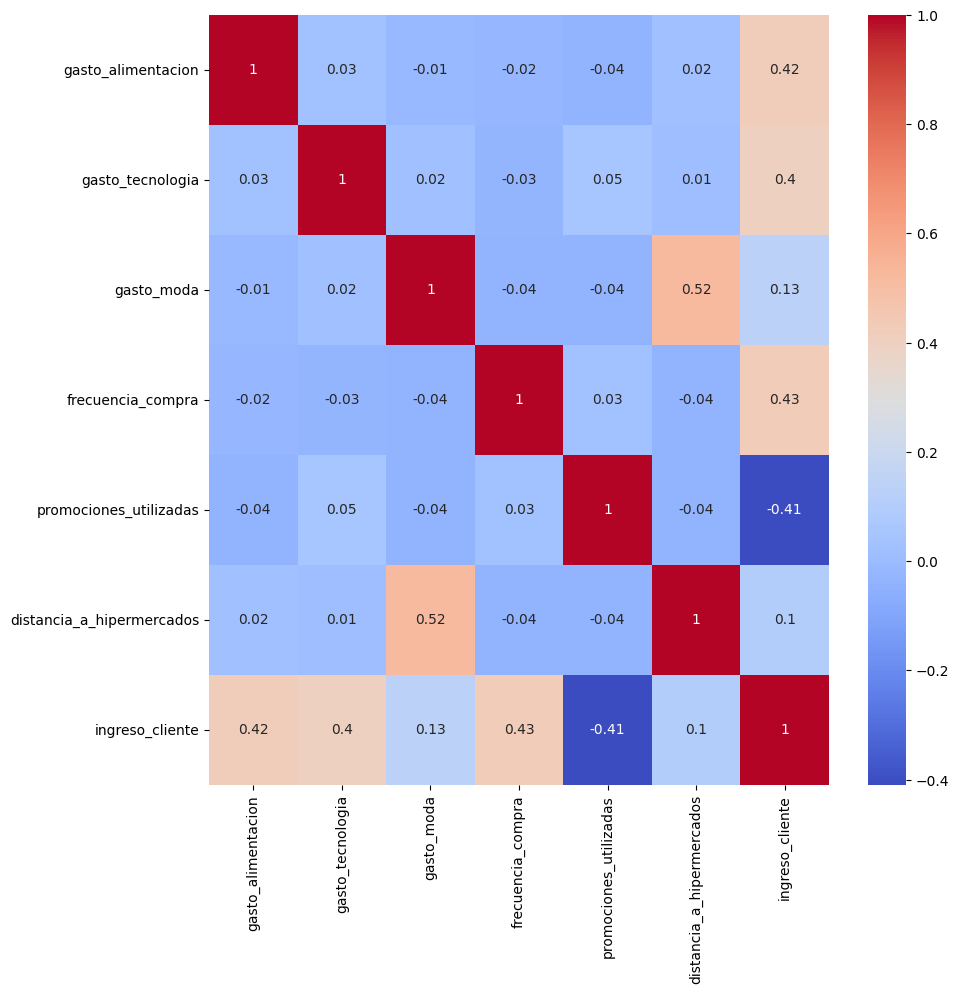

In [45]:
plt.figure(figsize = (10, 10))

sns.heatmap(
    round(df_ingreso_para_entrenar.corr(numeric_only=True),2), 
    cmap = 'coolwarm', 
    annot = True, 
    annot_kws = {"size": 10}
)

##### Decido elegir las variables a continuación ya que son las que mas correlación tienen con el ingreso del cliente. Gasto_moda no tiene tanta, pero la dejo por el simple hecho de que pongo a los otros dos tipos de gastos.

##### Variable dependiente: ingreso_cliente
##### Variables independientes: gasto_moda, frecuencia_compra, gasto_alimentacion, gasto_tecnologia

In [46]:
X = df_ingreso_para_entrenar[["gasto_moda", "frecuencia_compra", "gasto_alimentacion", "gasto_tecnologia"]]
y = df_ingreso_para_entrenar['ingreso_cliente']

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [48]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [49]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
gasto_moda,0.115265
frecuencia_compra,49.220987
gasto_alimentacion,0.306040
gasto_tecnologia,0.191998


##### Observamos conclusiones

Los coeficientes son números que indican cómo cambia la variable dependiente (en este caso, `ingreso_cliente`) en respuesta a cambios en las variables independientes (X). 

El coeficiente más grande (en valor absoluto) indicaría cual es la variable más explicativa o que más impacto tiene. En este caso es `frecuencia_compra`. Que tenga un coeficiente de 49, significa que probablemente sea una persona que tiene más ingresos, ya que compra más seguido.

El coeficiemte de gasto_moda es de 0.1, lo cual indica que la variable dependiente (ingreso_cliente) no cambia mucho en respuesta a cambios en la variable independiente (gasto_moda). Por lo tanto, la variable que no considero importante para la predicción del ingreso del cliente es `gasto_moda`. Con gasto_tecnología ocurre algo similar, su coeficiente es de 0.2.

El coeficiemte de gasto_alimentacion es de 0.3 (un poquito mas representativo que los otros 2 tipos de gastos, pero no tanto como frecuencia_compra).


In [50]:
y_pred = regressor.predict(X_test)

In [51]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(10)
df1

,Actual,Predicted
993,570.939669,404.550384
859,397.849304,375.984425
298,373.738068,420.483083
553,668.922801,741.871008
672,631.876828,535.480046
971,166.302855,664.512439
27,494.235282,425.546312
231,396.957635,367.464596
306,698.974318,509.376026
706,448.957609,438.423337


In [52]:
import numpy as np
predicciones = regressor.predict(X)
# Calculate MAPE
mape = np.mean(np.abs((y - predicciones) / y)) * 100
print(f"MAPE: {mape}%")

MAPE: 53.90655520229903%


Un MAPE de 53.9% significa que el modelo predice el ingreso del cliente con un error del 53.9%. Es decir, el modelo predice el ingreso del cliente con un error del 53.9%% en promedio.

___

# 3. Integrating Models and ROI in Advertising

Voy a usar el modelo que ya he entrenado y voy a predecir los modelos en el dataset para predecir.

## Ingreso para predecir

Se hace el mismo tratamiento que en el dataset de entrenamiento.

In [53]:
df_ingreso_para_predecir = pd.read_csv("ingreso_para_predecir.csv")
df_ingreso_para_predecir.head()

,Unnamed: 0.1,Unnamed: 0,gasto_alimentacion,gasto_tecnologia,gasto_moda,frecuencia_compra,promociones_utilizadas,distancia_a_hipermercados,ids
0,0,0,593.932154,650.245619,331.095148,4.0,1,48.833718,5000
1,1,1,743.670430,962.946539,371.514486,5.0,5,50.615011,5001
2,2,2,642.487038,1178.947183,562.292464,NaN,7,61.158411,5002
3,3,3,590.394865,1284.758802,500.710842,6.0,5,63.335536,5003
4,4,4,481.289319,1233.798435,102.862235,2.0,6,56.261429,5004


In [54]:
df_ingreso_para_predecir["gasto_moda"].fillna(0, inplace=True)

In [55]:
df_ingreso_para_predecir["frecuencia_compra"].fillna(df_ingreso_para_predecir["frecuencia_compra"].median(), inplace=True)

In [56]:
df_ingreso_para_predecir.drop(columns = ["Unnamed: 0", "Unnamed: 0.1"], inplace = True)

In [57]:
df_ingreso_para_predecir["ingreso_predicho"] = regressor.predict(df_ingreso_para_predecir[["gasto_moda", "frecuencia_compra", "gasto_alimentacion", "gasto_tecnologia"]])
df_ingreso_para_predecir.head()

,gasto_alimentacion,gasto_tecnologia,gasto_moda,frecuencia_compra,promociones_utilizadas,distancia_a_hipermercados,ids,ingreso_predicho
0,593.932154,650.245619,331.095148,4.0,1,48.833718,5000,410.428044
1,743.670430,962.946539,371.514486,5.0,5,50.615011,5001,570.171784
2,642.487038,1178.947183,562.292464,5.0,7,61.158411,5002,602.667300
3,590.394865,1284.758802,500.710842,6.0,5,63.335536,5003,649.163377
4,481.289319,1233.798435,102.862235,2.0,6,56.261429,5004,363.246410


## Conversión para predecir

Se hace el mismo tratamiento que en el dataset de entrenamiento.

In [58]:
df_conversion_para_predecir= pd.read_csv("conversion_para_predecir.csv")
df_conversion_para_predecir.head()

,,páginas visitadas,duración de la sesión,número de visitas,fecha de nacimiento,ubicación,dispositivo,ids
0,0,8,3270.001480,21,1917-05-18,Marte,móvil,5000
1,1,11,972.813149,27,1920-11-28,Ciudad C,móvil,5001
2,2,9,3791.649383,31,1922-06-21,Marte,móvil,5002
3,3,7,1148.957241,45,1928-04-20,Ciudad C,tablet,5003
4,4,2,1228.190036,32,1922-02-21,Ciudad A,móvil,5004


In [59]:
df_conversion_para_predecir.columns

Index(['    ', 'páginas visitadas ', 'duración de la sesión ',
       'número de visitas ', 'fecha de nacimiento ', 'ubicación ',
       'dispositivo ', 'ids'],
      dtype='object')

In [60]:
from functions import whitespace_remover_and_columns
df_conversion_para_decir = whitespace_remover_and_columns(df_conversion_para_predecir)

In [61]:
df_conversion_para_predecir = df_conversion_para_predecir[df_conversion_para_predecir["ubicación"] != "Marte"]

In [62]:
df_conversion_para_predecir = pd.get_dummies(df_conversion_para_predecir, columns=["ubicación", "dispositivo"])
df_conversion_para_predecir = df_conversion_para_predecir.replace({True: 1, False: 0})

In [63]:
df_conversion_para_predecir['duración de la sesión'] = df_conversion_para_predecir['duración de la sesión'].astype(int)

In [64]:
df_conversion_para_predecir["hoy"]= "2023-11-30"
df_conversion_para_predecir['hoy'] = pd.to_datetime(df_conversion_para_predecir['hoy'])
df_conversion_para_predecir['fecha de nacimiento'] = pd.to_datetime(df_conversion_para_predecir['fecha de nacimiento'])
df_conversion_para_predecir['edad'] = (df_conversion_para_predecir['hoy'] - df_conversion_para_predecir['fecha de nacimiento']).dt.days//365

In [65]:
df_conversion_para_predecir.head()

,,páginas visitadas,duración de la sesión,número de visitas,fecha de nacimiento,ids,ubicación_Ciudad A,ubicación_Ciudad B,ubicación_Ciudad C,dispositivo_móvil,dispositivo_ordenador,dispositivo_tablet,hoy,edad
1,1,11,972,27,1920-11-28,5001,0,0,1,1,0,0,2023-11-30,103
3,3,7,1148,45,1928-04-20,5003,0,0,1,0,0,1,2023-11-30,95
4,4,2,1228,32,1922-02-21,5004,1,0,0,1,0,0,2023-11-30,101
5,5,5,3206,7,1913-02-08,5005,0,0,1,1,0,0,2023-11-30,110
6,6,4,1920,12,1917-06-17,5006,1,0,0,0,0,1,2023-11-30,106


In [66]:
df_conversion_para_predecir["conversion_predicha"] = decision_tree_model.predict(df_conversion_para_predecir[["número de visitas", "páginas visitadas", "duración de la sesión", "dispositivo_móvil", "dispositivo_ordenador", "dispositivo_tablet", "ubicación_Ciudad A", "ubicación_Ciudad B", "ubicación_Ciudad C", "edad"]])
df_conversion_para_predecir.head()

,,páginas visitadas,duración de la sesión,número de visitas,fecha de nacimiento,ids,ubicación_Ciudad A,ubicación_Ciudad B,ubicación_Ciudad C,dispositivo_móvil,dispositivo_ordenador,dispositivo_tablet,hoy,edad,conversion_predicha
1,1,11,972,27,1920-11-28,5001,0,0,1,1,0,0,2023-11-30,103,1
3,3,7,1148,45,1928-04-20,5003,0,0,1,0,0,1,2023-11-30,95,0
4,4,2,1228,32,1922-02-21,5004,1,0,0,1,0,0,2023-11-30,101,0
5,5,5,3206,7,1913-02-08,5005,0,0,1,1,0,0,2023-11-30,110,0
6,6,4,1920,12,1917-06-17,5006,1,0,0,0,0,1,2023-11-30,106,0


Ahora voy a calcular el valor esperado del ingreso de esos clientes. Probabilidad de compra * Ingreso estimado. Cuál es el valor esperado del modelo?

## Estimación del Valor Esperado del Cliente
Dado un modelo de clasificación que provee una probabilidad de que cada cliente haga una compra, 
y un modelo de regresión que estima el ingreso por cliente, el valor esperado del ingreso de un cliente se puede calcular como:

\begin{equation*}
ValorEsperado_{ingreso} = Probabilidad_{compra} \times Ingreso_{estimado}
\end{equation*}

Donde $Probabilidad_{compra}$ es la probabilidad de compra predicha por el modelo de clasificación y $Ingreso_{estimado}$ es el ingreso 
estimado del modelo de regresión.

In [67]:
X = df_conversion_para_predecir[["número de visitas", "páginas visitadas", "duración de la sesión", "dispositivo_móvil", "dispositivo_ordenador", "dispositivo_tablet", "ubicación_Ciudad A", "ubicación_Ciudad B", "ubicación_Ciudad C", "edad"]]

In [68]:
prediccion = decision_tree_model.predict_proba(X)
prediccion

array([[0.        , 1.        ],
       [0.54104478, 0.45895522],
       [0.90909091, 0.09090909],
       ...,
       [0.90909091, 0.09090909],
       [0.        , 1.        ],
       [0.54104478, 0.45895522]])

In [69]:
len(prediccion)

702

In [70]:
proba_de_comprar_1 = [fila[1] for fila in prediccion]

df_conversion_para_predecir['Proba_de_compra_1'] = proba_de_comprar_1

In [71]:
df_conversion_para_predecir.head()

,,páginas visitadas,duración de la sesión,número de visitas,fecha de nacimiento,ids,ubicación_Ciudad A,ubicación_Ciudad B,ubicación_Ciudad C,dispositivo_móvil,dispositivo_ordenador,dispositivo_tablet,hoy,edad,conversion_predicha,Proba_de_compra_1
1,1,11,972,27,1920-11-28,5001,0,0,1,1,0,0,2023-11-30,103,1,1.000000
3,3,7,1148,45,1928-04-20,5003,0,0,1,0,0,1,2023-11-30,95,0,0.458955
4,4,2,1228,32,1922-02-21,5004,1,0,0,1,0,0,2023-11-30,101,0,0.090909
5,5,5,3206,7,1913-02-08,5005,0,0,1,1,0,0,2023-11-30,110,0,0.090909
6,6,4,1920,12,1917-06-17,5006,1,0,0,0,0,1,2023-11-30,106,0,0.090909


In [72]:
df_merged = pd.merge(df_conversion_para_predecir, df_ingreso_para_predecir, on='ids')

valor_esperado_ingreso_cliente = (df_merged['Proba_de_compra_1'] * df_merged['ingreso_predicho']).sum()

print('El valor esperado del modelo es de:', "$", valor_esperado_ingreso_cliente)

El valor esperado del modelo es de: $ 109483.16463908358


In [73]:
df_merged["valor_esperado"] = df_merged['Proba_de_compra_1'] * df_merged['ingreso_predicho']

In [74]:
df_merged.head()

,,páginas visitadas,duración de la sesión,número de visitas,fecha de nacimiento,ids,ubicación_Ciudad A,ubicación_Ciudad B,ubicación_Ciudad C,dispositivo_móvil,...,conversion_predicha,Proba_de_compra_1,gasto_alimentacion,gasto_tecnologia,gasto_moda,frecuencia_compra,promociones_utilizadas,distancia_a_hipermercados,ingreso_predicho,valor_esperado
0,1,11,972,27,1920-11-28,5001,0,0,1,1,...,1,1.000000,743.670430,962.946539,371.514486,5.0,5,50.615011,570.171784,570.171784
1,3,7,1148,45,1928-04-20,5003,0,0,1,0,...,0,0.458955,590.394865,1284.758802,500.710842,6.0,5,63.335536,649.163377,297.936923
2,4,2,1228,32,1922-02-21,5004,1,0,0,1,...,0,0.090909,481.289319,1233.798435,102.862235,2.0,6,56.261429,363.246410,33.022401
3,5,5,3206,7,1913-02-08,5005,0,0,1,1,...,0,0.090909,681.304702,290.811778,168.108394,5.0,3,56.446789,398.591342,36.235577
4,6,4,1920,12,1917-06-17,5006,1,0,0,0,...,0,0.090909,493.828490,1251.164851,102.916765,4.0,4,47.147467,468.866473,42.624225


Dado los resultados en el punto 1, voy a estimar en 1000 nuevos clientes cuántos esperaría que sean FP. Redondearé si es necesario y luego calcularé el costo de la publicidad desperdiciada dado ese estimado.


## Estimación de FP en 1000 clientes

Con el dataset de conversion_para_predecir, de 556 clientes que se estimaron, 142 fueron FP.

##### Regla de 3 simple:

556 (sum of confusion matrix) → 215

1000 → X (FP)

In [75]:
((1000*215)/556)

386.6906474820144

In [76]:
# FALSE POSITIVE RATE (WAY 1):
(215/(215+139))

0.6073446327683616

In [77]:
# FALSE POSITIVE RATE (WAY 2):
1 - 0.6073446327683616

0.3926553672316384

Se puede estimar que de 1000 nuevos clientes, 387 serían FP. (Redondeé para arriba)

## Costo de publicidad desperdiciada dada esa estimación

In [78]:
df_merged["conversion_predicha"].value_counts()

conversion_predicha
0    626
1     76
Name: count, dtype: int64

In [79]:
conversion_real = pd.read_csv("conversion_real.csv")

In [80]:
from functions import whitespace_remover_and_columns
conversion_real = whitespace_remover_and_columns(conversion_real)

In [81]:
conversion_real.columns

Index(['', 'convertido', 'ids'], dtype='object')

In [82]:
conversion_real.drop(columns = [""], inplace = True)

In [83]:
conversion_real.replace({"Sí": 1, "No": 0}, inplace=True)
conversion_real.head()

,convertido,ids
0,0,5000
1,1,5001
2,1,5002
3,0,5003
4,0,5004


In [84]:
conversion_real_y_predicha = pd.merge(conversion_real, df_conversion_para_predecir, on='ids')
conversion_real_y_predicha = conversion_real_y_predicha[["conversion_predicha", "convertido", "ids"]]
conversion_real_y_predicha.head()

,conversion_predicha,convertido,ids
0,1,1,5001
1,0,0,5003
2,0,0,5004
3,0,0,5005
4,0,0,5006


In [85]:
conversion_real_y_predicha["FP"] = (conversion_real_y_predicha["conversion_predicha"] == 1) & (conversion_real_y_predicha["convertido"] == 0)
conversion_real_y_predicha.head()

,conversion_predicha,convertido,ids,FP
0,1,1,5001,False
1,0,0,5003,False
2,0,0,5004,False
3,0,0,5005,False
4,0,0,5006,False



## Cálculo del Costo de Publicidad total
El costo de publicidad total se pude estimar dado nuestro modelo de clasificación. Aunque sea en otro set de entrenamiento tenemos una estimación que podemos inferir para otra muestra. La formula es

\begin{equation*}
CostoPublicidad_{Total} = Suma de Costo_{publicidad}
\end{equation*}


\begin{equation*}
CostoPublicidad_{desperdiciado} = FP_{i} \times Costo_{publicidad}
\end{equation*}

Donde $FP_{i}$ son los clientes especificios que fueron falsos positivos y $Costo_{publicidad}$ es el costo de publicidad por cliente dado en el dataset costo.csv

In [86]:
costo_publicidad = pd.read_csv("costo_publicidad.csv")
costo_publicidad.head()

,,ids,costo_publicidad
0,0,5000,209
1,1,5001,185
2,2,5002,328
3,3,5003,383
4,4,5004,281


In [87]:
costo_publicidad.shape

(3000, 3)

In [88]:
from functions import whitespace_remover_and_columns
costo_publicidad = whitespace_remover_and_columns(costo_publicidad)

In [89]:
total_costo_publicidad = costo_publicidad["costo_publicidad"].sum()
total_costo_publicidad

971305

In [90]:
conversion_real_y_predicha["ids"].nunique()

702

In [91]:
conversion_real_y_predicha_y_costo_publicidad = pd.merge(costo_publicidad, conversion_real_y_predicha, on="ids")
conversion_real_y_predicha_y_costo_publicidad.head()

,,ids,costo_publicidad,conversion_predicha,convertido,FP
0,1,5001,185,1,1,False
1,3,5003,383,0,0,False
2,4,5004,281,0,0,False
3,5,5005,311,0,0,False
4,6,5006,291,0,0,False


In [92]:
falsos_positivos = conversion_real_y_predicha_y_costo_publicidad[conversion_real_y_predicha_y_costo_publicidad["FP"] == True]
falsos_positivos.head()

,,ids,costo_publicidad,conversion_predicha,convertido,FP
14,19,5019,245,1,0,True
18,23,5023,444,1,0,True
21,26,5026,211,1,0,True
35,44,5044,215,1,0,True
53,68,5068,398,1,0,True


In [93]:
costo_desperdiciado = falsos_positivos["costo_publicidad"].sum()
print("El costo de publicidad desperdiciado es de:", "$" , costo_desperdiciado)

El costo de publicidad desperdiciado es de: $ 10884


Supongamos que después de estas estimaciones, estamos 1 mes después y ahora sabemos qué clientes convirtieron dataset conversion_real.csv.

Ahora voy a calcular el ROI cliente por cliente.

In [94]:
conversion_real

,convertido,ids
0,0,5000
1,1,5001
2,1,5002
3,0,5003
4,0,5004
...,...,...
995,1,5995
996,0,5996
997,0,5997
998,1,5998


In [95]:
conversion_real_y_predicha_y_costo_publicidad["TP"] = (conversion_real_y_predicha["conversion_predicha"] == 1) & (conversion_real_y_predicha["convertido"] == 1)
conversion_real_y_predicha_y_costo_publicidad.head()

,,ids,costo_publicidad,conversion_predicha,convertido,FP,TP
0,1,5001,185,1,1,False,True
1,3,5003,383,0,0,False,False
2,4,5004,281,0,0,False,False
3,5,5005,311,0,0,False,False
4,6,5006,291,0,0,False,False


In [96]:
df_merged.head()

,,páginas visitadas,duración de la sesión,número de visitas,fecha de nacimiento,ids,ubicación_Ciudad A,ubicación_Ciudad B,ubicación_Ciudad C,dispositivo_móvil,...,conversion_predicha,Proba_de_compra_1,gasto_alimentacion,gasto_tecnologia,gasto_moda,frecuencia_compra,promociones_utilizadas,distancia_a_hipermercados,ingreso_predicho,valor_esperado
0,1,11,972,27,1920-11-28,5001,0,0,1,1,...,1,1.000000,743.670430,962.946539,371.514486,5.0,5,50.615011,570.171784,570.171784
1,3,7,1148,45,1928-04-20,5003,0,0,1,0,...,0,0.458955,590.394865,1284.758802,500.710842,6.0,5,63.335536,649.163377,297.936923
2,4,2,1228,32,1922-02-21,5004,1,0,0,1,...,0,0.090909,481.289319,1233.798435,102.862235,2.0,6,56.261429,363.246410,33.022401
3,5,5,3206,7,1913-02-08,5005,0,0,1,1,...,0,0.090909,681.304702,290.811778,168.108394,5.0,3,56.446789,398.591342,36.235577
4,6,4,1920,12,1917-06-17,5006,1,0,0,0,...,0,0.090909,493.828490,1251.164851,102.916765,4.0,4,47.147467,468.866473,42.624225


## Cálculo del ROI

\begin{equation*}
ROI = \frac{\left((TP \times ValorEsperado_{ingreso}) \right) - \left( CostoPublicidad_{Total} \right)}{CostoPublicidad_{Total}}
\end{equation*}

donde $TP$ es el número de verdaderos positivos de $ValorEsperado_{ingreso}$ es el ingreso esperado calculado en base a los modelos de clasificación y regresión.

In [97]:
tp_con_roi = pd.merge(df_merged, conversion_real_y_predicha_y_costo_publicidad, on="ids")
tp_con_roi.replace({True: 1, False: 0}, inplace=True)
tp_con_roi

,_x,páginas visitadas,duración de la sesión,número de visitas,fecha de nacimiento,ids,ubicación_Ciudad A,ubicación_Ciudad B,ubicación_Ciudad C,dispositivo_móvil,...,promociones_utilizadas,distancia_a_hipermercados,ingreso_predicho,valor_esperado,_y,costo_publicidad,conversion_predicha_y,convertido,FP,TP
0,1,11,972,27,1920-11-28,5001,0,0,1,1,...,5,50.615011,570.171784,570.171784,1,185,1,1,0,1
1,3,7,1148,45,1928-04-20,5003,0,0,1,0,...,5,63.335536,649.163377,297.936923,3,383,0,0,0,0
2,4,2,1228,32,1922-02-21,5004,1,0,0,1,...,6,56.261429,363.246410,33.022401,4,281,0,0,0,0
3,5,5,3206,7,1913-02-08,5005,0,0,1,1,...,3,56.446789,398.591342,36.235577,5,311,0,0,0,0
4,6,4,1920,12,1917-06-17,5006,1,0,0,0,...,4,47.147467,468.866473,42.624225,6,291,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,994,11,2690,49,1925-07-05,5994,0,1,0,1,...,8,33.285348,313.142670,143.718464,994,178,0,0,0,0
698,995,9,2084,8,1918-06-12,5995,1,0,0,0,...,4,42.742721,523.173063,0.000000,995,405,0,1,0,0
699,997,7,3975,41,1918-07-12,5997,0,0,1,1,...,9,79.357971,1016.777315,92.434301,997,379,0,0,0,0
700,998,9,1986,18,1917-03-19,5998,0,1,0,0,...,5,70.177029,653.625445,653.625445,998,426,1,1,0,1


In [98]:
tp_con_roi["ROI"] = ((tp_con_roi["TP"] * tp_con_roi["valor_esperado"]) - (tp_con_roi["costo_publicidad"]))/tp_con_roi["costo_publicidad"]
tp_con_roi[["ROI", "ids"]]

,ROI,ids
0,2.082010,5001
1,-1.000000,5003
2,-1.000000,5004
3,-1.000000,5005
4,-1.000000,5006
...,...,...
697,-1.000000,5994
698,-1.000000,5995
699,-1.000000,5997
700,0.534332,5998


Ahora que sabemos qué cliente convirtió, podemos saber el costo de publicidad desperdiciado.

In [99]:
falsos_positivos_roi= tp_con_roi[tp_con_roi["FP"] == 1]

In [100]:
costo_desperdiciado_tp_con_roi = falsos_positivos_roi["costo_publicidad"].sum()
print("El costo de publicidad desperdiciado es de:", "$", costo_desperdiciado_tp_con_roi)

El costo de publicidad desperdiciado es de: $ 10884


## Cliente con mayor ROI

In [101]:
tp_con_roi.nlargest(1, "ROI")

,_x,páginas visitadas,duración de la sesión,número de visitas,fecha de nacimiento,ids,ubicación_Ciudad A,ubicación_Ciudad B,ubicación_Ciudad C,dispositivo_móvil,...,distancia_a_hipermercados,ingreso_predicho,valor_esperado,_y,costo_publicidad,conversion_predicha_y,convertido,FP,TP,ROI
555,779,9,3506,3,1914-01-04,5779,0,1,0,1,...,98.917854,704.188409,704.188409,779,179,1,1,0,1,2.934013


## Real model profit

## Cálculo del ROI

\begin{equation*}
ROI = \frac{\left((TP \times ValorEsperado_{ingreso}) \right) - \left( CostoPublicidad_{Total} \right)}{CostoPublicidad_{Total}}
\end{equation*}

donde $TP$ es el número de verdaderos positivos de $ValorEsperado_{ingreso}$ es el ingreso esperado calculado en base a los modelos de clasificación y regresión.

In [102]:
costo_publicidad_total_nuevos_clientes = tp_con_roi["costo_publicidad"].sum()
costo_publicidad_total_nuevos_clientes

225795

In [103]:
true_positives = tp_con_roi["TP"].sum()

In [104]:
tp_con_roi.head()

,_x,páginas visitadas,duración de la sesión,número de visitas,fecha de nacimiento,ids,ubicación_Ciudad A,ubicación_Ciudad B,ubicación_Ciudad C,dispositivo_móvil,...,distancia_a_hipermercados,ingreso_predicho,valor_esperado,_y,costo_publicidad,conversion_predicha_y,convertido,FP,TP,ROI
0,1,11,972,27,1920-11-28,5001,0,0,1,1,...,50.615011,570.171784,570.171784,1,185,1,1,0,1,2.08201
1,3,7,1148,45,1928-04-20,5003,0,0,1,0,...,63.335536,649.163377,297.936923,3,383,0,0,0,0,-1.00000
2,4,2,1228,32,1922-02-21,5004,1,0,0,1,...,56.261429,363.246410,33.022401,4,281,0,0,0,0,-1.00000
3,5,5,3206,7,1913-02-08,5005,0,0,1,1,...,56.446789,398.591342,36.235577,5,311,0,0,0,0,-1.00000
4,6,4,1920,12,1917-06-17,5006,1,0,0,0,...,47.147467,468.866473,42.624225,6,291,0,0,0,0,-1.00000


## Estimación del Valor Esperado del Cliente
Dado un modelo de clasificación que provee una probabilidad de que cada cliente haga una compra, 
y un modelo de regresión que estima el ingreso por cliente, el valor esperado del ingreso de un cliente se puede calcular como:

\begin{equation*}
ValorEsperado_{ingreso} = Probabilidad_{compra} \times Ingreso_{estimado}
\end{equation*}

Donde $Probabilidad_{compra}$ es la probabilidad de compra predicha por el modelo de clasificación y $Ingreso_{estimado}$ es el ingreso 
estimado del modelo de regresión.

In [105]:
valor_esperado = (tp_con_roi["conversion_predicha_y"] * tp_con_roi["ingreso_predicho"]).sum()

In [106]:
roi_modelo = ((true_positives * valor_esperado) - costo_publicidad_total_nuevos_clientes)/costo_publicidad_total_nuevos_clientes
roi_modelo

5.143512835407322